# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
from IPython.display import clear_output

!pip3 install pyprind

clear_output()

# Instructions

* Clone the notebook to your drive.
* The notebook has to be submitted in the form of a link giving us **view access**. Share this link in your application.

* If you still have any queries, you can reach out to the [core team](https://www.notion.so/Club-Contacts-70a4823e0ae34f35a0aa5d479e449915)



# Common Technical Questionnaire


### Question 1

Supervised learning is a type of machine learning where the inputs and outputs are mapped through
a family of equations, the machine learning model essentially picks the right curve to fit the data.
Quantile Regression is a type of supervised learning technique used in statistics and economics. One
advantage of quantile regression relative to ordinary least squares regression is that the quantile
regression estimates are more robust against outliers in the response measurements.

QuantileLossτ (y, ˆy) =
{

                           τ · (y − ˆy) if y > ˆy

                          (1 − τ ) · (ˆy − y) if y ≤ ˆy
}

where τ is Quantile whose value lies between 0 and 1.
Please use this template provided and make changes accordingly for this question alone.
Implement a simple Neural Network consisting of 4 nodes, one hidden layer consisting of 5 nodes
and output layer consisting of two nodes. Perform quantile regression on the model and observe
the loss.
**Bonus: Play around with the value of τ to find what value achieves convergence quicker.**



An example implementation of a simple manual neural network is provided. You may use this as inspiration to complete the task at hand.

In [ ]:
# Imports

import torch
import torch.nn as nn


In [ ]:
# Initializing the Parameters and the Variables
# y = a*x + b

x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

a0 = torch.rand((4, 5), requires_grad=True)     #For the hidden layer
b0 = torch.rand((2, 5), requires_grad=True)

a1 = torch.rand((5, 2), requires_grad=True)     #For the output layer.    Fill in the dimensions appropriately
b1 = torch.rand((2, 2), requires_grad=True)
ReLU=nn.ReLU()
# Forward Pass 1
y_1 = x@a0+ b0
y_pred1=y_1@a1+b1
z1=ReLU(y_pred1)                                    #Fill in the matrix multiplication equation

tau=0.2
def loss_function(z, y):
    e = y - z
    return torch.max((tau - 1) * e, tau * e).mean()

# Computing Loss
loss = loss_function(z1, y)
print('First gradient descent',loss.item())

# Back Propogation
loss.backward()

# Updating Gradients
with torch.no_grad():
    a0 -= 0.01 * a0.grad
    b0 -= 0.01 * b0.grad
    a1 -= 0.01 * a1.grad
    b1 -= 0.01 * b1.grad

    # Zeroing out gradients for the next iteration
    a0.grad.zero_()
    b0.grad.zero_()
    a1.grad.zero_()
    b1.grad.zero_()

# Forward Pass 2
y_2 = x@a0+ b0
y_pred2= y_2@a1+b1                                      #Fill in the matrix multiplication equation
z2=ReLU(y_pred2)
# Computing Loss
loss = loss_function(z2, y)
print('Second gradient descent',loss.item())

loss.backward()

# Updating Gradients
with torch.no_grad():
    a0 -= 0.01 * a0.grad
    b0 -= 0.01 * b0.grad
    a1 -= 0.01 * a1.grad
    b1 -= 0.01 * b1.grad

    a0.grad.zero_()
    b0.grad.zero_()
    a1.grad.zero_()
    b1.grad.zero_()

# Forward Pass 3
y_3 =  x@a0+ b0                      #Fill in the matrix multiplication equation
y_pred3=y_3@a1+b1
z3=ReLU(y_pred3)
# Computing Loss
loss = loss_function(z3, y)
print('Third gradient descent',loss.item())

First gradient descent 2.8450026512145996
Second gradient descent 2.791003704071045
Third gradient descent 2.7376251220703125


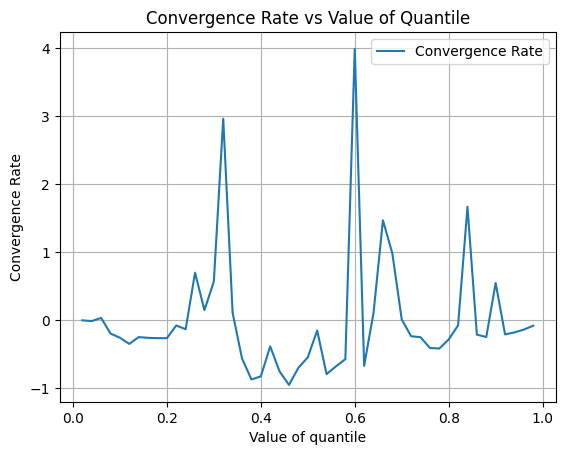

Optimum value of tau is 0.6


In [ ]:
# The above cell caters to the first part of the question.
#This cell aims to attempt the bonus part. So the best quantile value will be where the convergence rate will be highest,
#because this shows that the loss function decreases very rapidly at that point. We dont need tau such that the loss is the lowest,
#we need a tau that can adapt very fast even though loss is high, because quantile regression is all about predicting the range in which the value falls.
#Even though chances of going out of the range is high, but due to high convergence rate it can learn faster.
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Initialize the Parameters and the Variables
# y = a*x + b
x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

a0 = torch.rand((4, 5), requires_grad=True)  # For the hidden layer
b0 = torch.rand((2, 5), requires_grad=True)

a1 = torch.rand((5, 2), requires_grad=True)  # For the output layer
b1 = torch.rand((2, 2), requires_grad=True)
ReLU = nn.ReLU()
quantile = [tau * 0.02 for tau in range(1, 50)]

# Initialize lists to store convergence rates and loss values
convergence_rates = []

# Define loss function
def loss_function(preds, target, tau):
    errors = target - preds
    loss = torch.max((tau - 1) * errors, tau * errors)
    return torch.abs(loss).mean()


for tau in quantile:

    num_iter = 500
    lossprev = 1

    convergence_rate_t = []  #list for stroing each acquired value for convergence rate.

    # Iterate within a quantile value:
    for i in range(num_iter):
        # Forward Pass
        y_int = torch.relu(x @ a0 + b0)
        y_pred = y_int @ a1 + b1

        # Compute Loss
        loss = loss_function(y_pred, y, tau)

        # Find value of convergence rate on the basis of loss obtained
        if i > 1:
            convergence = (loss - lossprev) / lossprev
        lossprev = loss

        # Backpropagation
        loss.backward()

        # Update gradients
        with torch.no_grad():
            a0 -= 0.01 * a0.grad
            b0 -= 0.01 * b0.grad
            a1 -= 0.01 * a1.grad
            b1 -= 0.01 * b1.grad


            a0.grad.zero_()
            b0.grad.zero_()
            a1.grad.zero_()
            b1.grad.zero_()

    convergence_rate_t.append(convergence)
    convergence_rates.append(convergence)

# Plot the Convergence Rate vs. tau
plt.plot(quantile, [c.detach().numpy() for c in convergence_rates], label='Convergence Rate')
plt.xlabel('Value of quantile')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rate vs Value of Quantile')
plt.grid(True)
plt.legend()
plt.show()
optimum = quantile[convergence_rates.index(max(convergence_rates))]
print('Optimum value of tau is',optimum)



---